In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [2]:
df = pd.read_csv('BTCUSD_1min.csv')

In [3]:
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528
1,1586390340000,2020-04-08 23:59:00,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954
2,1586390280000,2020-04-08 23:58:00,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774
3,1586390220000,2020-04-08 23:57:00,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251
4,1586390160000,2020-04-08 23:56:00,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867


In [4]:
df.shape

(2283519, 8)

In [5]:
df.tail()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
2283514,1444311840,2015-10-08 13:44:00,BTCUSD,242.96,242.96,242.96,242.96,0.033491
2283515,1444311780,2015-10-08 13:43:00,BTCUSD,242.95,242.96,242.95,242.96,0.010000
2283516,1444311720,2015-10-08 13:42:00,BTCUSD,242.95,242.95,242.95,242.95,0.000000
2283517,1444311660,2015-10-08 13:41:00,BTCUSD,242.50,242.95,242.50,242.95,0.001000
2283518,1444311600,2015-10-08 13:40:00,BTCUSD,0.00,242.50,0.00,242.50,0.050000


### Visualizing the price

<AxesSubplot:>

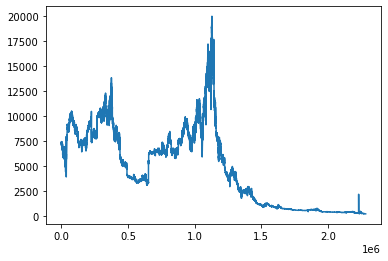

In [6]:
df["Close"].plot()

In [7]:
#Check null values
df.isnull().sum().sum()

0

In [8]:
#Check data types
df.dtypes

Unix Timestamp      int64
Date               object
Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
dtype: object

In [9]:
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = pd.to_numeric(df['Close'])

In [10]:
df.dtypes

Unix Timestamp             int64
Date              datetime64[ns]
Symbol                    object
Open                     float64
High                     float64
Low                      float64
Close                    float64
Volume                   float64
dtype: object

# Feature Engineering

In [11]:
#set date as index
df = df.set_index('Date')
df.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-09 00:00:00,1586390400000,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528
2020-04-08 23:59:00,1586390340000,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954
2020-04-08 23:58:00,1586390280000,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774
2020-04-08 23:57:00,1586390220000,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251
2020-04-08 23:56:00,1586390160000,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867


### Percent Change

In [12]:
#Percent change for each variable
df['open_%_change'] = df['Open'].pct_change()
df['high_%_change'] = df['High'].pct_change()
df['low_%_change'] = df['Low'].pct_change()
df['close_%_change'] = df['Close'].pct_change()
df['volume_%_change'] = df['Volume'].pct_change()
df.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,open_%_change,high_%_change,low_%_change,close_%_change,volume_%_change
Date,,,,,,,,,,,,
2020-04-09 00:00:00,1586390400000,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528,NaN,NaN,NaN,NaN,NaN
2020-04-08 23:59:00,1586390340000,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954,-0.000710,0.000000,0.002164,0.002611,-0.830484
2020-04-08 23:58:00,1586390280000,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774,-0.000473,-0.000328,-0.000473,-0.000710,-0.222876
2020-04-08 23:57:00,1586390220000,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251,-0.000444,-0.000144,-0.000444,-0.000473,-0.974233
2020-04-08 23:56:00,1586390160000,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867,0.001779,0.000623,0.000000,-0.000444,15.946822


### Getting the 20mins simple moving average

In [13]:
df['20_min_sma_close'] = df['Close'].rolling(window=20).mean()
df.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,open_%_change,high_%_change,low_%_change,close_%_change,volume_%_change,20_min_sma_close
Date,,,,,,,,,,,,,
2020-04-09 00:00:00,1586390400000,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-08 23:59:00,1586390340000,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954,-0.000710,0.000000,0.002164,0.002611,-0.830484,NaN
2020-04-08 23:58:00,1586390280000,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774,-0.000473,-0.000328,-0.000473,-0.000710,-0.222876,NaN
2020-04-08 23:57:00,1586390220000,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251,-0.000444,-0.000144,-0.000444,-0.000473,-0.974233,NaN
2020-04-08 23:56:00,1586390160000,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867,0.001779,0.000623,0.000000,-0.000444,15.946822,NaN


### Visualizing the price and the 20-minute SMA

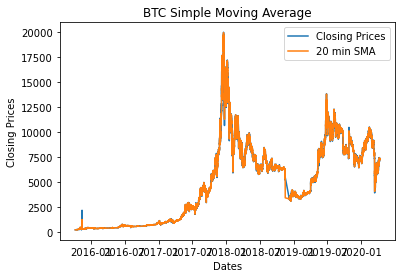

In [14]:
# Plot the simple moving average for 20 min
plt.title('BTC Simple Moving Average')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df['Close'], label='Closing Prices')
plt.plot(df['20_min_sma_close'], label='20 min SMA')
plt.legend()
plt.show()

### Creating the upper and lower bands from the 20min moving average 

In [15]:
# two standard deviation away from the 20 min moving average
df['Upper Band_2'] = df['20_min_sma_close'] + (2 * df['Close'].rolling(window=20).std())
df['Lower Band_2'] = df['20_min_sma_close'] - (2 * df['Close'].rolling(window=20).std())
df.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume,open_%_change,high_%_change,low_%_change,close_%_change,volume_%_change,20_min_sma_close,Upper Band_2,Lower Band_2
Date,,,,,,,,,,,,,,,
2020-04-09 00:00:00,1586390400000,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-08 23:59:00,1586390340000,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954,-0.000710,0.000000,0.002164,0.002611,-0.830484,NaN,NaN,NaN
2020-04-08 23:58:00,1586390280000,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774,-0.000473,-0.000328,-0.000473,-0.000710,-0.222876,NaN,NaN,NaN
2020-04-08 23:57:00,1586390220000,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251,-0.000444,-0.000144,-0.000444,-0.000473,-0.974233,NaN,NaN,NaN
2020-04-08 23:56:00,1586390160000,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867,0.001779,0.000623,0.000000,-0.000444,15.946822,NaN,NaN,NaN


In [16]:
def bb_strategy(data, lower_bb, upper_bb):
    buy = []
    sell = []
    b_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy.append(data[i])
                sell.append(np.nan)
                signal = 1
                b_signal.append(signal)
            else:
                buy.append(np.nan)
                sell.append(np.nan)
                b_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy.append(np.nan)
                sell.append(data[i])
                signal = -1
                b_signal.append(signal)
            else:
                buy.append(np.nan)
                sell.append(np.nan)
                b_signal.append(0)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            b_signal.append(0)
            
    return buy, sell, b_signal

buy, sell, b_signal = bb_strategy(df['Close'], df['Lower Band_2'], df['Upper Band_2'])

# SMAC

In [18]:
smac = df['Close'].values

In [20]:
short_lb = 9 
long_lb = 21
signal_df = pd.DataFrame(index=df.index)
signal_df['signal'] = 0.0
signal_df['short_mav'] = df[['Close']].rolling(window=short_lb,min_periods=1, center=False).mean()

In [21]:
signal_df['long_mav'] = df[['Close']].rolling(window=long_lb, min_periods=1, center=False).mean()

In [22]:
signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > signal_df['long_mav'][short_lb:], 1.0, 0.0)   

In [23]:
signal_df['positions'] = signal_df['signal'].diff()
signal_df[signal_df['positions'] == -1.0]

,signal,short_mav,long_mav,positions
Date,,,,
2020-04-08 23:23:00,0.0,7387.911111,7387.913333,-1.0
2020-04-08 22:46:00,0.0,7366.197778,7366.685714,-1.0
2020-04-08 22:06:00,0.0,7353.776667,7353.934762,-1.0
2020-04-08 21:23:00,0.0,7357.260000,7358.383810,-1.0
2020-04-08 21:02:00,0.0,7353.583333,7353.935238,-1.0
...,...,...,...,...
2015-10-08 17:13:00,0.0,244.020000,244.020000,-1.0
2015-10-08 17:09:00,0.0,244.020000,244.020000,-1.0
2015-10-08 16:08:00,0.0,244.854444,244.855714,-1.0


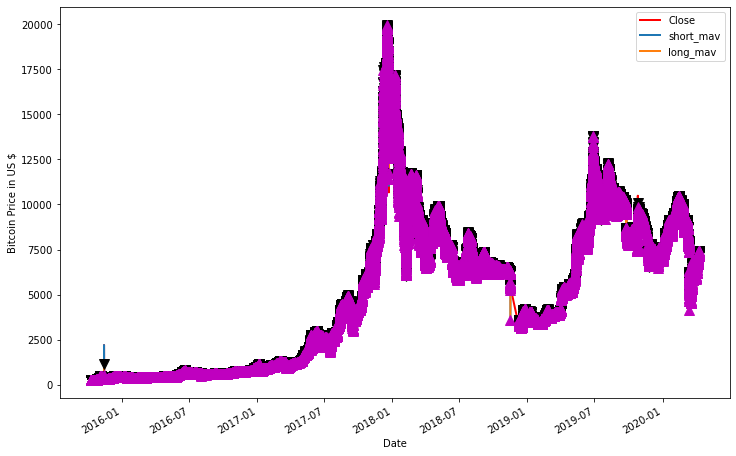

In [24]:
fig = plt.figure()
plt1 = fig.add_subplot(111,  ylabel='Bitcoin Price in US $')
df[['Close']].plot(ax=plt1, color='r', lw=2.)

signal_df[['short_mav', 'long_mav']].plot(ax=plt1, lw=2., figsize=(12,8))
plt1.plot(signal_df.loc[signal_df.positions == -1.0].index,signal_df.short_mav[signal_df.positions == -1.0],'v',                     markersize=10, color='k')
plt1.plot(signal_df.loc[signal_df.positions == 1.0].index,signal_df.short_mav[signal_df.positions == 1.0],'^', markersize=10, color='m')         # Show the plotplt.show()


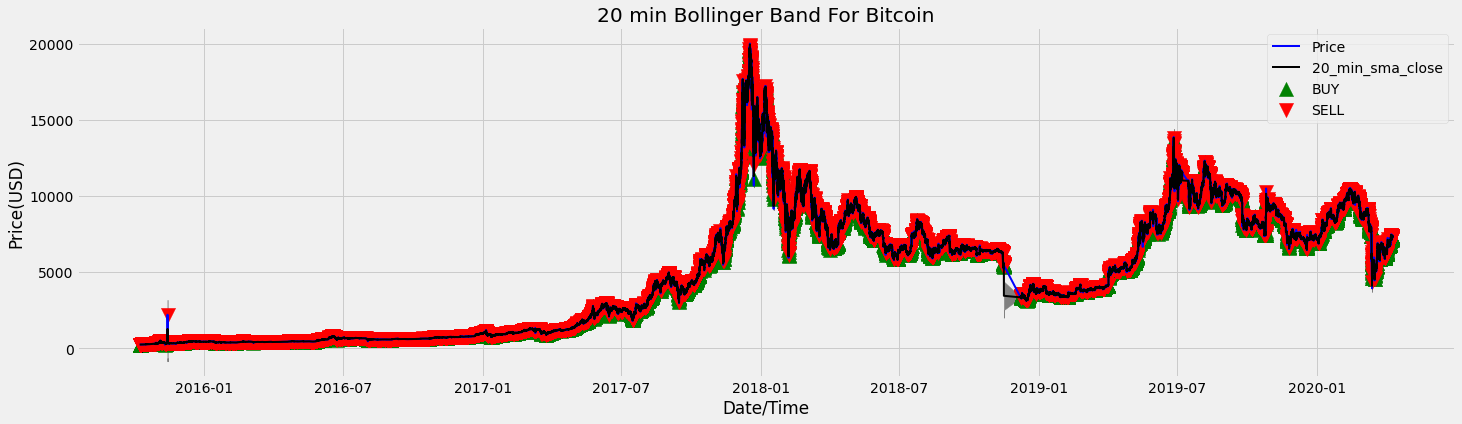

In [25]:
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(22,6))
ax = fig.add_subplot(111)

# Get index values for the X axis 
x_axis = df.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band 
ax.fill_between(x_axis, df['Upper Band_2'], df['Lower Band_2'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, df['Close'], color='blue', label = 'Price', lw=2)
ax.plot(x_axis, df['20_min_sma_close'], color='black', label = '20_min_sma_close', lw=2)

plt.scatter(df.index, buy, marker = '^', color = 'green', label = 'BUY', s = 200)

plt.scatter(df.index, sell, marker = 'v', color = 'red', label = 'SELL', s = 200)
# Set Title & Show the Image
ax.set_title('20 min Bollinger Band For Bitcoin')
ax.set_xlabel('Date/Time')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show();

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.shape

# RESULTS: QUANTIFIED AUTOMATED TRADING PERFORMANCE

In [26]:
# initial trading capital
trad_capital= float(1000)

positions = pd.DataFrame(index=signal_df.index).fillna(0.0)

#Buy a 1000 USD in Bitcoins
positions['Position ($)'] = signal_df['signal']

portfolio = positions.multiply(df['Close'], axis = 0)

pos_diff = positions.diff()

portfolio['holdings'] = (positions.multiply(df['Close'], axis = 0)).sum(axis = 1)

portfolio['cash'] = trad_capital - (pos_diff.multiply(df['Close'],axis = 0)).sum(axis = 1).cumsum()

portfolio['total'] = portfolio['cash'] + portfolio['holdings']

In [27]:
signal_df.head()

,signal,short_mav,long_mav,positions
Date,,,,
2020-04-09 00:00:00,0.0,7350.4100,7350.4100,NaN
2020-04-08 23:59:00,0.0,7360.0050,7360.0050,0.0
2020-04-08 23:58:00,0.0,7361.4600,7361.4600,0.0
2020-04-08 23:57:00,0.0,7361.3175,7361.3175,0.0
2020-04-08 23:56:00,0.0,7360.5780,7360.5780,0.0


In [28]:
portfolio ['returns'] = portfolio['total'].pct_change()

In [30]:
del portfolio['Position ($)']

print(portfolio.head())
print(portfolio.tail())

                     holdings    cash   total  returns
Date                                                  
2020-04-09 00:00:00       0.0  1000.0  1000.0      NaN
2020-04-08 23:59:00       0.0  1000.0  1000.0      0.0
2020-04-08 23:58:00       0.0  1000.0  1000.0      0.0
2020-04-08 23:57:00       0.0  1000.0  1000.0      0.0
2020-04-08 23:56:00       0.0  1000.0  1000.0      0.0
                     holdings           cash          total  returns
Date                                                                
2015-10-08 13:44:00       0.0 -129681.296036 -129681.296036      0.0
2015-10-08 13:43:00       0.0 -129681.296036 -129681.296036      0.0
2015-10-08 13:42:00       0.0 -129681.296036 -129681.296036      0.0
2015-10-08 13:41:00       0.0 -129681.296036 -129681.296036      0.0
2015-10-08 13:40:00       0.0 -129681.296036 -129681.296036      0.0


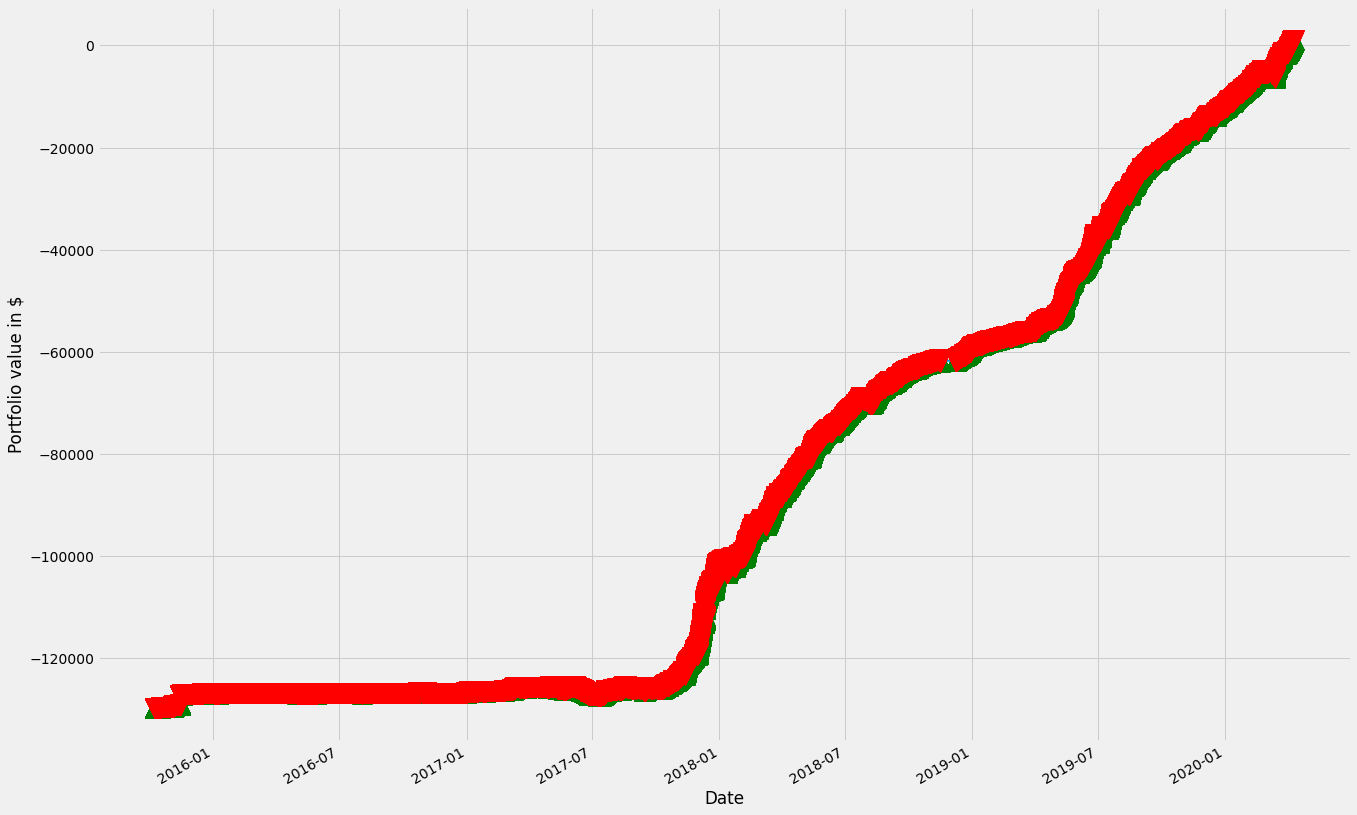

In [31]:
fig = plt.figure(figsize =(20,15))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signal_df.positions == 1.0].index,portfolio.total[signal_df.positions == 1.0], '^', markersize = 20, color = 'g')

ax1.plot(portfolio.loc[signal_df.positions == -1.0].index,portfolio.total[signal_df.positions == -1.0], 'v', markersize = 20, color = 'r')

plt.show()

In [33]:
print('Portfolio Total Value as of 2015-10-08 ')
print(portfolio['total'].tail(1))

print('Absolute return as of 2018-11-29 ')

print((((portfolio['total'].head(1)/float(1000)) - float(1))*100))

Portfolio Total Value as of 2015-10-08 
Date
2015-10-08 13:40:00   -129681.296036
Name: total, dtype: float64
Absolute return as of 2018-11-29 
Date
2020-04-09    0.0
Name: total, dtype: float64


In [ ]:
# replacing all the missing values with 0
df.dropna(inplace = True)

# Arima Model

### First, Check for stationarity

In [ ]:
result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])